In [1]:
import matplotlib.pyplot as plt
import lhapdf
import numpy as np
import json
import math

In [2]:
## Getting a PDF member object
set_cteq6 = lhapdf.getPDFSet("cteq6l1")
p_cteq6 = set_cteq6.mkPDFs()
#p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
#p_cteq6 = lhapdf.mkPDF("cteq6l1/0")

LHAPDF 6.3.0 loading all 1 PDFs in set cteq6l1
cteq6l1, version 4; 1 PDF members


Q2 is  6.089999999999999


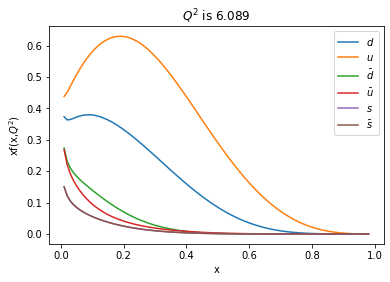

In [3]:
Q2 = [4,4.75,5,5.75,6.09]
Q=math.sqrt(Q2[4])
print("Q2 is ",Q*Q)
x_axis = np.arange(0.01,0.99,0.01)
y_dv=[]
y_uv=[]
y_dbar=[]
y_ubar=[]
y_g = []
y_s = []
y_sbar = []
for x in np.arange(0.01,0.99,0.01):
    y_dv.append(p_cteq6[0].xfxQ(1,x,Q))
    y_uv.append(p_cteq6[0].xfxQ(2,x,Q))
    y_dbar.append(p_cteq6[0].xfxQ(-1,x,Q))
    y_ubar.append(p_cteq6[0].xfxQ(-2,x,Q))
    y_g.append(p_cteq6[0].xfxQ(0,x,Q))
    y_s.append(p_cteq6[0].xfxQ(3,x,Q))
    y_sbar.append(p_cteq6[0].xfxQ(-3,x,Q))
    
#y_uv[0] = 0    
plt.plot(x_axis,y_dv,label=r"$d$")
plt.plot(x_axis,y_uv,label=r"$u$")
#plt.plot(x_axis,y_1,label=r"$g$")
plt.plot(x_axis,y_dbar,label=r"$\bar d$")
plt.plot(x_axis,y_ubar,label=r"$\bar u$")
plt.plot(x_axis,y_s,label = r"$s$")
plt.plot(x_axis,y_sbar,label = r"$\bar s$")
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str = str(Q*Q)
plt.title(r"$Q^2$ is "+Q2_str[0:5])
plt.legend()

In [4]:
u_bar=np.asarray(y_ubar)
d_bar=np.asarray(y_dbar)
u_v=np.asarray(y_uv)
d_v=np.asarray(y_dv)
R_sea_NS=5*(u_bar+d_bar)/(u_v+d_v)
Bxz=R_sea_NS


Text(0, 0.5, '$R_{sea_{NS}}$')

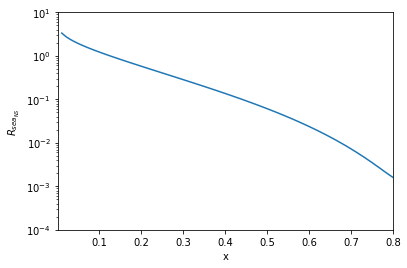

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis,Bxz,label="B(x)")
ax.set_yscale("log")
plt.ylim(1e-4,1e1)
plt.xlim(0.001,0.8)
plt.xlabel("x")
plt.ylabel(r"$R_{sea_{NS}}$")

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


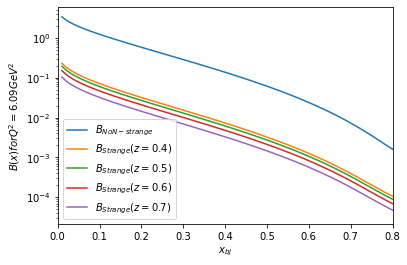

In [6]:
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
zs = [0.4,0.5,0.6,0.7]

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis,Bxz,label=r"$B_{NoN-strange}$")
for zi in zs:
    duplus = JAM20.xfxQ(2,zi,Q)
    duminus = JAM20.xfxQ(-2,zi,Q)
    dsplus = JAM20.xfxQ(3,zi,Q)
    dsminus = JAM20.xfxQ(-3,zi,Q)
    rsea_s_d = (dsplus+dsminus)/duplus/(1+duminus/duplus)
    R_sea_strange = []
    for x in np.arange(0.01,0.99,0.01):
        y_d=(p_cteq6[0].xfxQ(1,x,Q))
        y_u=(p_cteq6[0].xfxQ(2,x,Q))
        y_s=(p_cteq6[0].xfxQ(3,x,Q))
        y_sbar=(p_cteq6[0].xfxQ(-3,x,Q))
        rsea_s = rsea_s_d*(y_s+y_sbar)/(y_d+y_u)
        R_sea_strange.append(rsea_s)
    plt.plot(x_axis,R_sea_strange,label=f"$B_{{Strange}}(z = {zi})$")
ax.set_yscale("log")
plt.xlim(0,0.8)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$B(x)forQ^2 = 6.09GeV^2$")
plt.legend()

Text(0.5, 0, 'x')

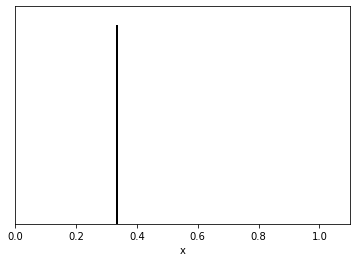

In [7]:
plt.plot([1/3, 1/3], [0, 1], color='k', linestyle='-', linewidth=2)
plt.ylim(1e-4,1.1)
plt.xlim(0,1.1)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.xlabel("x")


Text(0.5, 0, 'x')

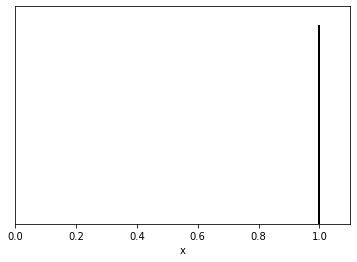

In [8]:
plt.plot([1, 1], [0, 1], color='k', linestyle='-', linewidth=2)
plt.ylim(1e-4,1.1)
plt.xlim(0,1.1)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.xlabel("x")



In [9]:
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


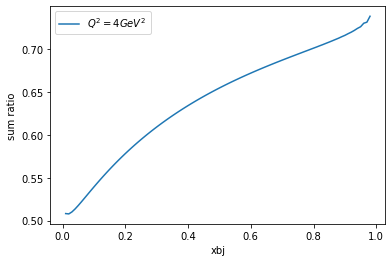

In [10]:
Q = 2
xbjs = np.arange(0.01,0.99,0.01)
sum_ratio = []
diff_ratio = []

for xbj in xbjs:
    u = JAM20_PDF.xfxQ(2,xbj,Q)
    ub = JAM20_PDF.xfxQ(-2,xbj,Q)
    d = JAM20_PDF.xfxQ(1,xbj,Q)
    db = JAM20_PDF.xfxQ(-1,xbj,Q)
    sum_ratio.append((4*u+4*ub+d+db)/(5*(u+d+ub+db)))
    diff_ratio.append((4*u-4*ub-d+db)/(3*(u-ub+d-db)))
    
plt.plot(xbjs,sum_ratio,label = r'$Q^2=4GeV^2$')
plt.xlabel('xbj')
plt.ylabel('sum ratio')
plt.legend()
plt.savefig('allresults/sum_ratio.pdf')

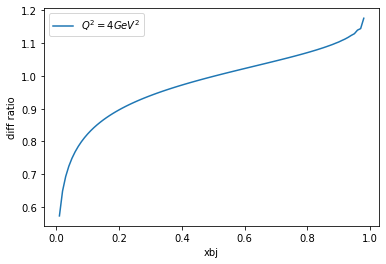

In [11]:
plt.plot(xbjs,diff_ratio,label = r'$Q^2=4GeV^2$')
plt.xlabel('xbj')
plt.ylabel('diff ratio')

plt.legend()
plt.savefig('allresults/diff_ratio.pdf')

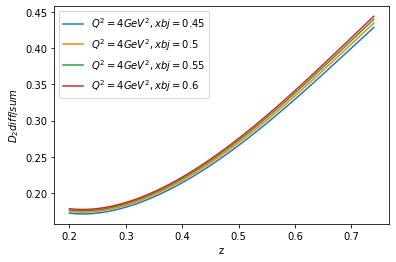

In [12]:
xbjs = np.arange(0.45,0.65,0.05)
for xbj in xbjs:
    D2_diffsum_ratio = []
    zs = np.arange(0.2,0.75,0.01)
    for z_had in zs:
        u = JAM20_PDF.xfxQ(2,xbj,Q)
        ub = JAM20_PDF.xfxQ(-2,xbj,Q)
        d = JAM20_PDF.xfxQ(1,xbj,Q)
        db = JAM20_PDF.xfxQ(-1,xbj,Q)
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        D2_diffsum_ratio.append(3*(u-ub+d-db)*(duplus-duminus)/(5*(u+d+ub+db)*(duplus+duminus)))

    plt.plot(zs,D2_diffsum_ratio,label=f'$Q^2 = 4GeV^2,xbj = {xbj}$')
plt.xlabel('z')
plt.ylabel(r'$D_2 diff/sum$')
plt.legend()
plt.savefig('allresults/D2_diffsum_ratio.pdf')

In [13]:
import sys
sys.path.insert(1,'DSS')
import fDSS_

In [14]:
help(fDSS_)

Help on module fDSS_:

NAME
    fDSS_

DESCRIPTION
    This module 'fDSS_' is auto-generated with f2py (version:1.21.2).
    Functions:
      result = fdss(ih,ic,io,x,q2)
      fint = fint(narg,arg,nent,ent,table)
    COMMON blocks:
      /fragini/ fini
    .

DATA
    __f2py_numpy_version__ = '1.21.2'
    fdss = <fortran object>
    fint = <fortran fint>
    fragini = <fortran object>

VERSION
    1.21.2

FILE
    /Users/shuojia/CSV/notebook/DSS/fDSS_.cpython-39-darwin.so


